<a href="https://colab.research.google.com/github/Rahul711sharma/Seoul-Bike-Sharing-Demand-Prediction-WIP-/blob/main/Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

## <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


## <b> Data Description </b>

### <b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


### <b>Attribute Information: </b>

* ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [58]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from plotnine import*
import datetime as dt
import plotly.graph_objects as go
import plotly.offline as pyo
import plotly.express as px
from plotly.offline import init_notebook_mode
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Rahul711sharma/Seoul-Bike-Sharing-Demand-Prediction-WIP-/main/SeoulBikeData.csv",encoding= 'unicode_escape',date_parser="Date")

# Exploratory Data analysis

In [4]:
df.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
df.shape

(8760, 14)

In [11]:
df.describe(include='all')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
count,8760,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760.000000,8760,8760,8760,8760.000000,8760.000000,8760.000000,8760.000000
unique,365,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,2,2,NaN,NaN,NaN,NaN
top,2018-05-21 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Summer,No Holiday,Yes,NaN,NaN,NaN,NaN
freq,24,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2208,8328,8465,NaN,NaN,NaN,NaN
first,2017-01-12 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,2018-12-11 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,704.602055,11.500000,12.882922,58.226256,1.724909,1436.825799,4.073813,0.569111,0.148687,0.075068,NaN,NaN,NaN,2017.915068,15.720548,6.526027,3.021918
std,NaN,644.997468,6.922582,11.944825,20.362413,1.036300,608.298712,13.060369,0.868746,1.128193,0.436746,NaN,NaN,NaN,0.278796,8.796749,3.448048,1.999994
min,NaN,0.000000,0.000000,-17.800000,0.000000,0.000000,27.000000,-30.600000,0.000000,0.000000,0.000000,NaN,NaN,NaN,2017.000000,1.000000,1.000000,0.000000
25%,NaN,191.000000,5.750000,3.500000,42.000000,0.900000,940.000000,-4.700000,0.000000,0.000000,0.000000,NaN,NaN,NaN,2018.000000,8.000000,4.000000,1.000000


In [12]:
df.shape

(8760, 18)

In [13]:
df.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
Year                         0
Day                          0
Month                        0
weekday                      0
dtype: int64

**Extracting Features from ``Date``**

In [14]:
df['Date']=pd.to_datetime(df['Date'])
df['Year'] = pd.DatetimeIndex(df['Date']).year
df['Day'] = pd.DatetimeIndex(df['Date']).day
df['Month']= pd.DatetimeIndex(df['Date']).month
df['weekday']=pd.DatetimeIndex(df['Date']).weekday

In [16]:
df.head(3)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day,Year,Day,Month,weekday
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes,2017,12,1,3


In [51]:
display(df['weekday'].unique())


array([3, 6, 2, 4, 0, 5, 1])

``weekday`` is in range 0-6 so we need to make it in normal 1-7.

In [56]:
df['weekday'] = np.array(df['weekday'])+1
display(df['weekday'].unique())


array([4, 7, 3, 5, 1, 6, 2])

**Demand of rented bikes at different times**

In [57]:
Rented_biked_per_year = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Year']).sum()).reset_index().sort_values("Year", ascending=True)
Rented_biked_per_month = pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Month']).sum()).reset_index().sort_values("Month", ascending=True)
Rented_biked_per_Day= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['Day']).sum()).reset_index().sort_values("Day", ascending=True)
Rented_biked_per_Weekday= pd.DataFrame(df['Rented Bike Count'].groupby(by=df['weekday']).sum()).reset_index().sort_values("weekday", ascending=True)
Rented_biked_per_Weekday

,weekday,Rented Bike Count
0,1,863563
1,2,862877
2,3,908871
3,4,928267
4,5,898966
5,6,911475
6,7,798295


In [61]:
px.line(Rented_biked_per_month,'Month','Rented Bike Count')

In [17]:
#Categorical Feature Exploration

for i in df.columns:
  if i not in list(df.describe().columns)+['Date']:
    print(f"{i}:\n {df[i].value_counts()} \n")

Seasons:
 Summer    2208
Spring    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

Holiday:
 No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Functioning Day:
 Yes    8465
No      295
Name: Functioning Day, dtype: int64 



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Seasons')

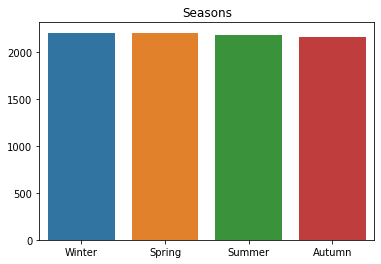

In [18]:
sns.barplot(df['Seasons'].unique(),list(pd.DataFrame(df['Seasons'].value_counts()).iloc[:,0]))
plt.title('Seasons')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Holiday')

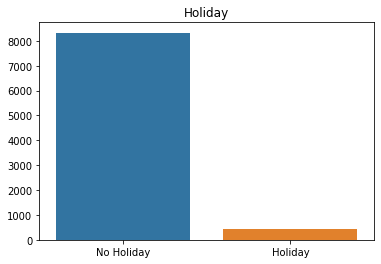

In [19]:
sns.barplot(df['Holiday'].unique(),list(pd.DataFrame(df['Holiday'].value_counts()).iloc[:,0]))
plt.title('Holiday')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0.5, 1.0, 'Functioning Day')

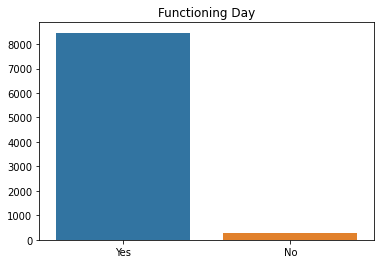

In [20]:
sns.barplot(df['Functioning Day'].unique(),list(pd.DataFrame(df['Functioning Day'].value_counts()).iloc[:,0]))
plt.title('Functioning Day')

/usr/local/lib/python3.7/dist-packages/plotnine/utils.py:1246: FutureWarning:

is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead



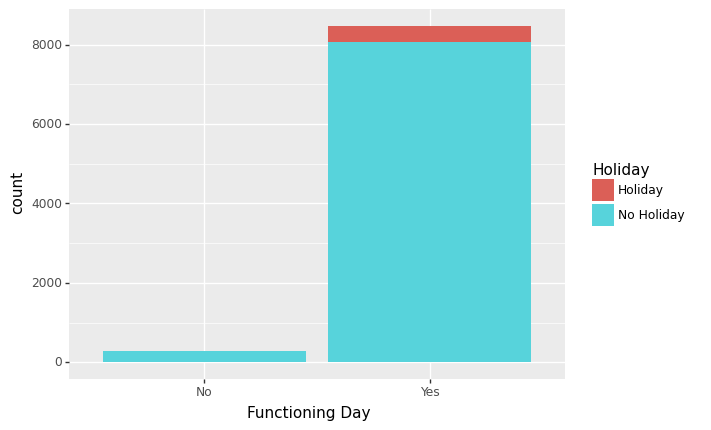

<ggplot: (8764167498301)>

In [21]:
ggplot(df)+ aes('Functioning Day',fill='Holiday')+geom_bar()

Here's an ironic insight, all the holidays are falling in the functioning hours of the day.